In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Read the CSV file into a DataFrame
data = pd.read_csv('cleaned_data.csv')

# Split the data into features (X) and target variable (y)
X = data.drop('Diabetes', axis=1)  # Features
y = data['Diabetes']  # Target variable

To determine the baseline accuracy, you need to establish a simple model or a straightforward rule that serves as a benchmark for your prediction task. The baseline accuracy can be obtained by implementing this basic model and evaluating its performance on your dataset. Here are some common approaches to establish the baseline accuracy:

Majority Class Baseline: For classification tasks, a straightforward baseline is to predict the majority class for all instances. This means always choosing the class that appears most frequently in the target variable. Calculate the percentage of the majority class in the dataset and use that as the baseline accuracy.



In [63]:
# Calculate the percentage of the majority class in the target variable
majority_class_percentage = (data['Diabetes'].value_counts() / len(data)).max()

# Baseline accuracy is the percentage of the majority class
baseline_accuracy = majority_class_percentage * 100

print("Baseline Accuracy: {:.2f}%".format(baseline_accuracy))

Baseline Accuracy: 50.00%


Random Baseline: Another simple baseline is to make random predictions. This involves predicting the target class randomly, following the distribution of the classes in the training data. The accuracy of this random model will vary every time you run it, so it's a good idea to average the accuracy over multiple runs.



In [64]:
# Calculate the number of unique classes in the target variable
num_classes = len(data['Diabetes'].unique())

# Calculate the probability of each class occurring randomly
random_baseline_accuracy = 1 / num_classes * 100

print("Random Baseline Accuracy: {:.2f}%".format(random_baseline_accuracy))

Random Baseline Accuracy: 50.00%


## Logistic Regression Modeling

### Let's do some EDA for logsitic regression model. First, we want to look at the multicollinearity.

#### Detecting Multicollinearity with the Correlation Coefficient

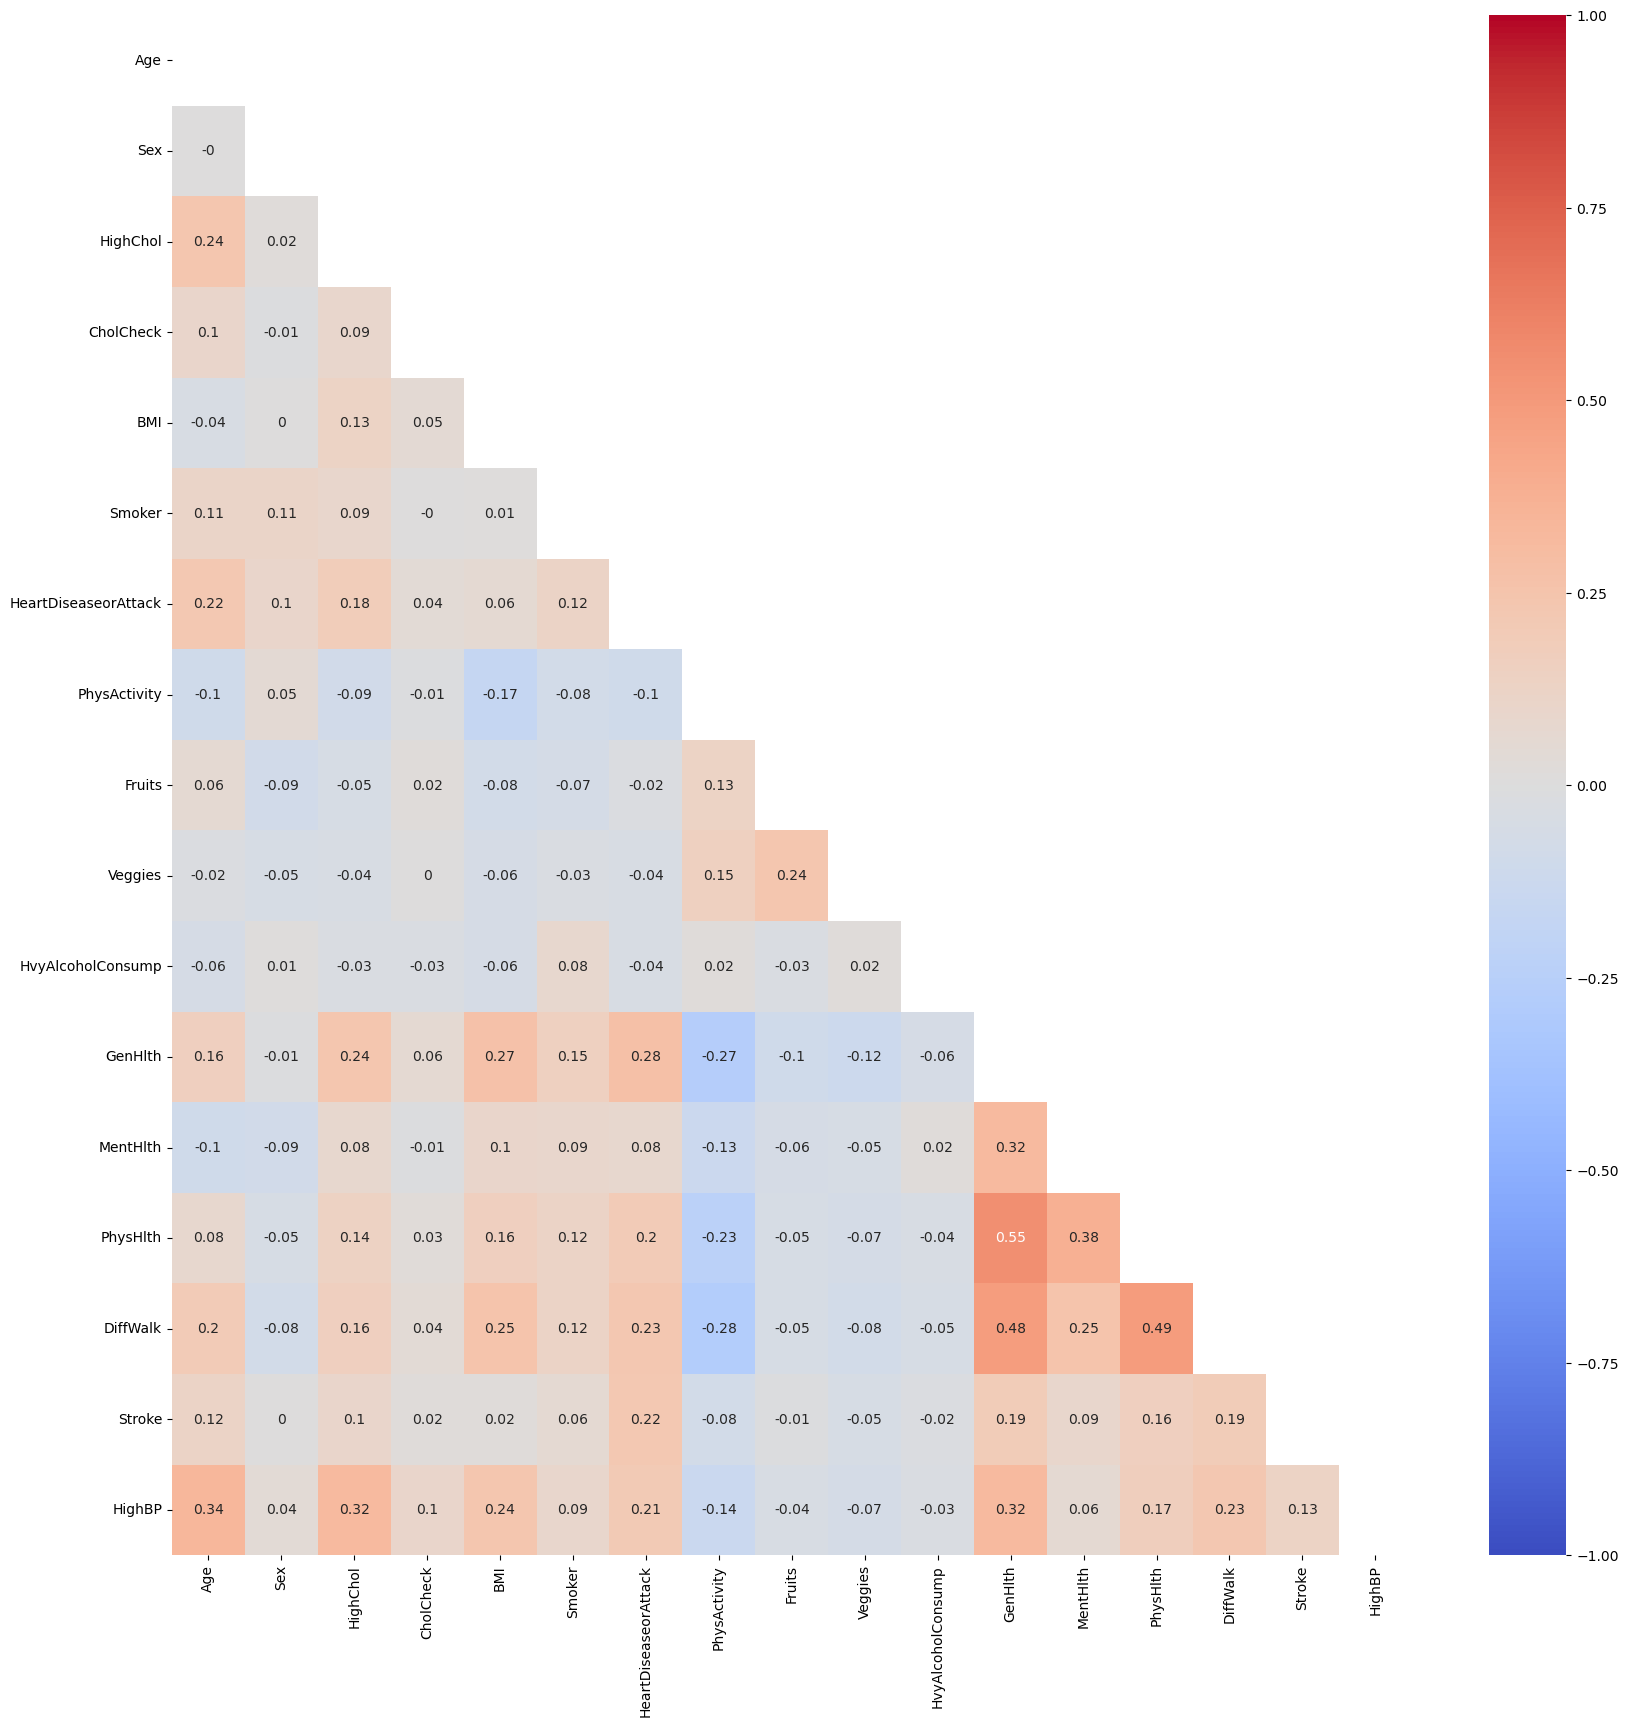

In [3]:
corr_df = X.corr()

# Let's visulaize it

# Mask for upper-triangular
mask = np.triu(corr_df)

plt.figure(figsize=(20,20))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, cmap='coolwarm', mask=mask, center=0)
plt.show()

One thing to note, though, is that there is *not* a strong linear relation between the *independent* variable features.  This is a **good** sign, because high multicollinearity between features can lead to an increase in standard errors of the model.  In other words, if the features have high multicollinearity, it becomes difficult to ascertain the true impact of each of the features.

#### Detecting Multicollinearity with the Variance Inflation Factors

In [4]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_withcons = sm.add_constant(X)
X_withcons.head()
variance_inflation_factor(X_withcons.values, 1)
pd.Series([variance_inflation_factor(X_withcons.values, i) for i in range(X_withcons.shape[1])], 
         index = X_withcons.columns)[1:]

Age                     1.290376
Sex                     1.057843
HighChol                1.177929
CholCheck               1.021040
BMI                     1.180545
Smoker                  1.071585
HeartDiseaseorAttack    1.193143
PhysActivity            1.158427
Fruits                  1.099093
Veggies                 1.085492
HvyAlcoholConsump       1.020334
GenHlth                 1.804669
MentHlth                1.247999
PhysHlth                1.695271
DiffWalk                1.559931
Stroke                  1.092492
HighBP                  1.353665
dtype: float64

A VIF score of above 5 is an indication of multi collinearity. Since in our example all of the VIF scores are below 5, we are good with multi collinearity. 

### Logistical Regression Model

1. Split the data into training and testing sets:

In [5]:
# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
# Proportion of classes (0 or 1) in the target column
print('Class proportions of Training set :')
print(y_train.value_counts(normalize=True))
print('Class proportions of Testing set :')
print(y_test.value_counts(normalize=True))

Class proportions of Training set :
0.0    0.500061
1.0    0.499939
Name: Diabetes, dtype: float64
Class proportions of Testing set :
1.0    0.500141
0.0    0.499859
Name: Diabetes, dtype: float64


The results show that the two classes are split close to 50% in both training and testing datasets, suggesting the there is no bais to majority class.

Now we are done with data preprocessing and cleaning, so we can start our logistic modeling

2. Create and train the logistic regression model:

In [7]:
# Create the logistic regression model
logreg = LogisticRegression()

# Train the model using the training data
logreg.fit(X_train, y_train)

C:\Users\jwong\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

The warning suggests that the model does not converge. We need to sale thre data. But we will continue with the code first. 

3. Make predictions on the test set:

In [8]:
# Make predictions on the test set
y_pred = logreg.predict(X_test)

4. Evaluate the model's performance:

Accuracy: 0.7485854394568088
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74     10601
         1.0       0.74      0.77      0.75     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



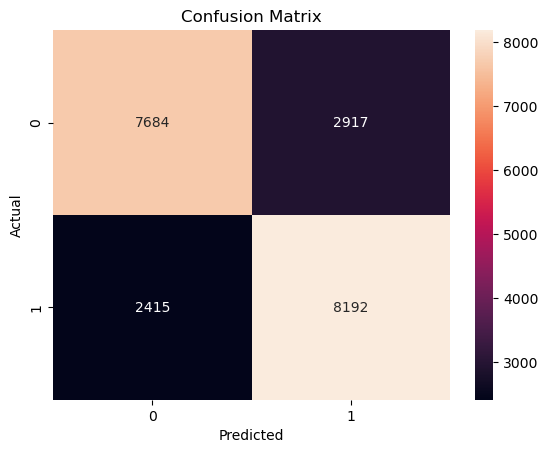

In [11]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The accuracy is calculated as the proportion of correct predictions (both true positives and true negatives) out of the total number of predictions.

Accuracy = (True Positives + True Negatives) / Total Predictions

In this case, the total predictions are the sum of all values in the confusion matrix:

Total Predictions = 7540 + 3061 + 2415 + 8192 = 21208

Now, let's calculate the accuracy:

Accuracy = (8192 + 7540) / 21208 ≈ 0.7418

Interpreting the accuracy:

The accuracy of approximately 74.18% means that the model correctly predicted 74.18% of the total instances in the dataset.
To summarize the model's performance based on the confusion matrix and accuracy:

True Positives (TP): 8192
True Negatives (TN): 7540
False Positives (FP): 3061
False Negatives (FN): 2415

So, let's scale the data to see if we can improve the accuracy. 

### Scaling the data. Let's scale the data to see if we can increase the accuracy.

Accuracy: 0.7485854394568088
Classification Report of Scaled- Logistical regression Model: 
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74     10601
         1.0       0.74      0.77      0.75     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



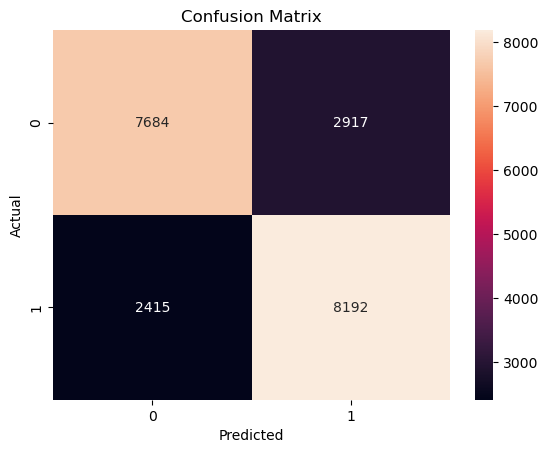

In [12]:
from sklearn.preprocessing import StandardScaler

# Create the standard scaler
scaler = StandardScaler()

# Scale the numerical features in X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the logistic regression model
logreg = LogisticRegression()

# Train the model using the scaled training data
logreg.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = logreg.predict(X_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report of Scaled- Logistical regression Model: ")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

True Positives (TP): 8192

True Negatives (TN): 7684

False Positives (FP): 2917

False Negatives (FN): 2415


The accuracy for scaled data increases from 74.18% to 74.86%, suggesting that the model is more correctly predicting diabetes or non-diabetes in the dataset. 

Precision: Precision measures the ability of the model to correctly classify positive instances (diabetes) among all instances it predicted as positive. For class 0 (non-diabetes), the precision is 0.76, indicating that 76% of the instances predicted as non-diabetes are actually non-diabetes. For class 1 (diabetes), the precision is 0.74, meaning that 74% of the instances predicted as diabetes are actually diabetes.

Recall: Recall (also known as sensitivity or true positive rate) measures the ability of the model to correctly identify positive instances (diabetes) among all actual positive instances. For class 0 (non-diabetes), the recall is 0.72, indicating that the model correctly identified 72% of the actual non-diabetes cases. For class 1 (diabetes), the recall is 0.77, meaning that the model correctly identified 77% of the actual diabetes cases.

F1-score: The F1-score is the harmonic mean of precision and recall. It balances precision and recall and is a useful metric when dealing with imbalanced datasets. For class 0 (non-diabetes), the F1-score is 0.74, and for class 1 (diabetes), the F1-score is 0.75.

Support: The support is the number of instances in each class. In this case, there are 10601 instances of class 0 and 10607 instances of class 1.

Accuracy: The overall accuracy of the model is 0.75, which means that it correctly predicted 75% of all instances in the dataset.

Macro Avg: The macro average is the average of precision, recall, and F1-score across both classes. In this case, it's 0.75, indicating a balanced performance.

Weighted Avg: The weighted average is the weighted average of precision, recall, and F1-score based on the number of instances in each class. It's also 0.75 in this case.

### To obtain logistic regression results with statistical details such as p-values, confidence intervals, and statistical tests, I use the statsmodels library.

In [13]:
import statsmodels.api as sm

# Add a constant to the feature matrix X
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)

# Obtain the results of the logistic regression model
results = logit_model.fit()

# Print the summary of the logistic regression results
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.513426
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Diabetes   No. Observations:                70692
Model:                          Logit   Df Residuals:                    70674
Method:                           MLE   Df Model:                           17
Date:                Mon, 24 Jul 2023   Pseudo R-squ.:                  0.2593
Time:                        12:47:18   Log-Likelihood:                -36295.
converged:                       True   LL-Null:                       -49000.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -7.3529      0.109    -67.345      0.000      -7.567      -7.139

### Hyperparameter tuning for logistic Regression model using GridserachCV

Accuracy: 0.7470825376617866
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      7090
         1.0       0.73      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



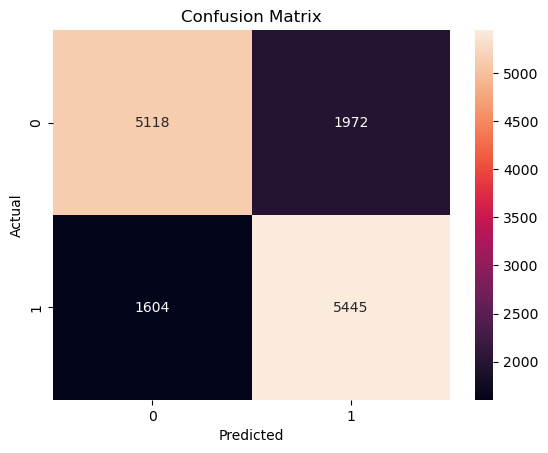

In [14]:
# Import required libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Read the CSV file into a DataFrame
data = pd.read_csv('cleaned_data.csv')

# Split the data into features (X) and target variable (y)
X = data.drop('Diabetes', axis=1)  # Features
y = data['Diabetes']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
logreg = LogisticRegression()

# Define hyperparameters for tuning
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best hyperparameters to create the final model
final_model = LogisticRegression(**best_params)

# Fit the final model on the training data
final_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: The accuracy of the model is approximately 74.71%, which means that it correctly classified about 74.71% of the total instances in the dataset. This is a common metric used to measure overall performance, but it's essential to look at other metrics as well to get a better understanding of the model's capabilities.

Precision: Precision measures how many of the instances predicted as a particular class were actually correct. For class 0.0, the precision is around 76%. This implies that 76% of the instances predicted as class 0.0 were true positives, while the remaining 24% were false positives. Similarly, for class 1.0, the precision is about 73%, meaning 73% of the instances predicted as class 1.0 were true positives, and 27% were false positives.

Recall: Recall, also known as sensitivity or true positive rate, tells us how many of the actual instances of a class were correctly predicted by the model. For class 0.0, the recall is approximately 72%, indicating that the model identified 72% of the actual instances belonging to class 0.0, but it missed 28% of them. For class 1.0, the recall is about 77%, which means the model correctly identified 77% of the actual instances of class 1.0, but it missed 23% of them.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance. For class 0.0, the F1-score is around 0.74, and for class 1.0, it is approximately 0.75. F1-score is useful when you want to consider both false positives and false negatives in your evaluation.

Support: The support represents the number of instances in each class, which are used to calculate the metrics. In this case, there are 7090 instances of class 0.0 and 7049 instances of class 1.0.

Macro avg: The macro average takes the unweighted mean of precision, recall, and F1-score across all classes. It treats each class equally, regardless of its size. In this case, the macro average for precision, recall, and F1-score is approximately 0.75.

Weighted avg: The weighted average also takes the mean of precision, recall, and F1-score, but it considers the number of instances in each class. It is weighted by the support (number of samples) in each class. In this case, the weighted average for precision, recall, and F1-score is approximately 0.75.



### Feature enginering 


In [18]:
# Step 1: Fit the logistic regression model
logreg.fit(X_train_scaled, y_train)

# Step 2: Retrieve the coefficients
coefficients = logreg.coef_[0]

# Step 3: Take the absolute values of the coefficients to get their magnitudes
importance_scores = np.abs(coefficients)

# Step 4 (Optional): Normalize the importance scores
normalized_importance_scores = importance_scores / np.sum(importance_scores)

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance scores
print(feature_importance_df)

                  Feature  Importance
3               CholCheck    1.284961
10      HvyAlcoholConsump    0.780466
16                 HighBP    0.754601
11                GenHlth    0.685518
2                HighChol    0.566134
4                     BMI    0.528956
0                     Age    0.445440
6    HeartDiseaseorAttack    0.263290
1                     Sex    0.217214
14               DiffWalk    0.176179
15                 Stroke    0.172760
9                 Veggies    0.126363
13               PhysHlth    0.092965
8                  Fruits    0.062054
7            PhysActivity    0.041705
12               MentHlth    0.037947
17  ChronicConditionRatio    0.020286
5                  Smoker    0.015249



CholCheck, HvyAlcoholConsump, and HighBP are the top three most important features that positively influence the likelihood of diabetes.

GenHlth, HighChol, and BMI are also relatively important features in determining diabetes risk.

Age, HeartDiseaseorAttack, and Sex also show some level of importance, though not as strong as the top features.

Accuracy: 0.7462338213452153
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      7090
         1.0       0.73      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



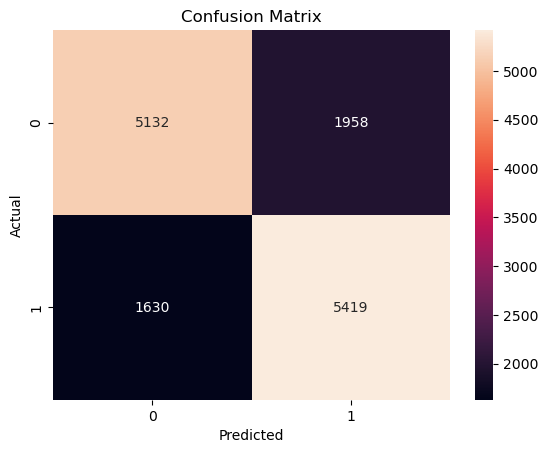

In [35]:
# Read the CSV file into a DataFrame
data = pd.read_csv('cleaned_data.csv')

# Drop the 'Smoker' column
data.drop('Smoker', axis=1, inplace=True)

# Split the data into features (X) and target variable (y)
X = data.drop('Diabetes', axis=1)  # Features
y = data['Diabetes']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train the logistic regression model with tuned hyperparameters
logreg = LogisticRegression(C=1.0, max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Step 7: Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


The accuracy remains similar after hyperparameter tuning.

Accuracy: It is the percentage of correctly classified instances out of the total instances. In your case, the model has an accuracy of approximately 74.62%, meaning it predicted the correct class for about 74.62% of the data points.

Precision: For each class (0.0 and 1.0), precision tells us the proportion of true positive predictions (correctly predicted instances) out of all instances predicted as that class. For example, for class 0.0, the precision of 0.76 means that 76% of the instances predicted as class 0.0 were actually correct, while 24% were incorrect.

Recall: Also known as sensitivity or true positive rate, recall represents the proportion of true positive predictions out of all actual instances belonging to that class. For instance, a recall of 0.72 for class 0.0 means the model identified 72% of the actual instances of class 0.0, but missed 28% of them.

F1-score: It is the harmonic mean of precision and recall, providing a balanced measure of a model's performance. It considers both false positives (precision) and false negatives (recall). F1-score is useful when you want to strike a balance between precision and recall.

Support: The number of instances in each class. It helps in understanding how many samples belong to each class and is used in calculating the metrics.

Macro avg: The macro average takes the unweighted mean of precision, recall, and F1-score across all classes. It gives equal importance to each class, regardless of its size. In this case, the macro average for precision, recall, and F1-score is approximately 0.75.

Weighted avg: The weighted average takes the same metrics as the macro average but considers the number of instances in each class. It is weighted by the support (number of samples) in each class. It provides a more accurate overall performance measure, giving higher importance to larger classes. In this case, the weighted average for precision, recall, and F1-score is approximately 0.75.

## 2. KNN

KNN is a simple and effective classification algorithm that can be used for both binary and multiclass classification tasks, making it suitable for predicting binary outcomes like diabetes.

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = pd.read_csv('cleaned_data.csv')

# Split the data into features (X) and target variable (y)
X = data.drop('Diabetes', axis=1)  # Features
y = data['Diabetes']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement the KNN algorithm
knn_initial = KNeighborsClassifier(n_neighbors=5)  
knn_initial.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_initial = knn_initial.predict(X_test_scaled)



In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier()

# Define the range of k values to try
param_grid = {'n_neighbors': range(1, 21)}  # Try k values from 1 to 20

# Perform GridSearchCV to find the optimal k value
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best k value
best_k = grid_search.best_params_['n_neighbors']
print("Best k value:", best_k)

# Train the KNN model with the best k value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_optimal = knn_best.predict(X_test_scaled)



Best k value: 19


Initial KNN Model
Accuracy: 0.7143362331140816
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.68      0.70      7090
         1.0       0.70      0.75      0.72      7049

    accuracy                           0.71     14139
   macro avg       0.72      0.71      0.71     14139
weighted avg       0.72      0.71      0.71     14139


Optimal KNN Model
Accuracy: 0.7374637527406465
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.69      0.72      7090
         1.0       0.71      0.79      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



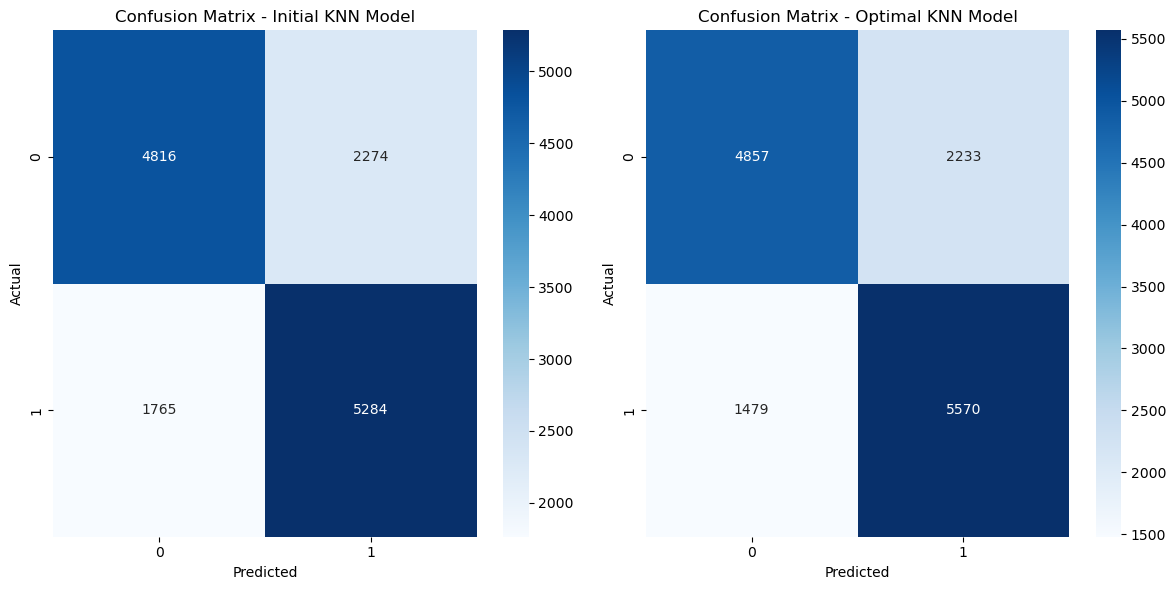

In [49]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create and train the initial KNN model with k=5 (you can use your chosen initial k value)
knn_initial = KNeighborsClassifier(n_neighbors=5)
knn_initial.fit(X_train_scaled, y_train)

# Make predictions on the test set using the initial model
y_pred_initial = knn_initial.predict(X_test_scaled)

# Calculate accuracy of the initial model
accuracy_initial = accuracy_score(y_test, y_pred_initial)

# Generate classification report and confusion matrix for the initial model
classification_report_initial = classification_report(y_test, y_pred_initial)
conf_matrix_initial = confusion_matrix(y_test, y_pred_initial)

# Create and train the optimal KNN model with the best k value (e.g., k=19)
knn_optimal = KNeighborsClassifier(n_neighbors=19)
knn_optimal.fit(X_train_scaled, y_train)

# Make predictions on the test set using the optimal model
y_pred_optimal = knn_optimal.predict(X_test_scaled)

# Calculate accuracy of the optimal model
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)

# Generate classification report and confusion matrix for the optimal model
classification_report_optimal = classification_report(y_test, y_pred_optimal)
conf_matrix_optimal = confusion_matrix(y_test, y_pred_optimal)

# Print accuracy and classification report for the initial model
print("Initial KNN Model")
print("Accuracy:", accuracy_initial)
print("Classification Report:")
print(classification_report_initial)

# Print accuracy and classification report for the optimal model
print("\nOptimal KNN Model")
print("Accuracy:", accuracy_optimal)
print("Classification Report:")
print(classification_report_optimal)

# Create a figure with two subplots for confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for the initial model
sns.heatmap(conf_matrix_initial, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix - Initial KNN Model')

# Plot confusion matrix for the optimal model
sns.heatmap(conf_matrix_optimal, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Confusion Matrix - Optimal KNN Model')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


Comparing the results of the Initial KNN Model and the Optimal KNN Model:

Accuracy: The accuracy of the Initial KNN Model is approximately 71.43%, while the accuracy of the Optimal KNN Model is approximately 73.75%. The Optimal KNN Model has a slightly higher accuracy, indicating that it performs better than the Initial KNN Model.

Precision and Recall: Looking at the precision, recall, and F1-score for both classes (0 and 1), we can see that the Optimal KNN Model generally performs better in terms of precision and recall for both classes compared to the Initial KNN Model. In particular, for class 1, the Optimal KNN Model has higher precision and recall, which means it is better at correctly identifying positive cases (class 1) compared to the Initial KNN Model.

F1-score: The F1-score takes both precision and recall into account and provides a single metric to evaluate the model's performance. The Optimal KNN Model has a slightly higher F1-score compared to the Initial KNN Model, which further indicates its better overall performance.

Support: The support indicates the number of occurrences of each class in the test set. Both models have similar support values for classes 0 and 1, as expected since the test set is the same for both models.

In summary, the Optimal KNN Model outperforms the Initial KNN Model in terms of accuracy, precision, recall, and F1-score. It provides an improvement in predicting positive cases (class 1) while maintaining good performance for negative cases (class 0). Therefore, the Optimal KNN Model is the preferred choice for predicting diabetes in this dataset.

Comapring the confusion matrix:
Comparison:

True Positives (TP): The number of correct positive predictions (class 1) is higher in the Optimal KNN Model (5570) compared to the Initial KNN Model (5284). This indicates that the Optimal KNN Model is better at identifying true positive cases.

True Negatives (TN): The number of correct negative predictions (class 0) is higher in the Optimal KNN Model (4857) compared to the Initial KNN Model (4816). This indicates that the Optimal KNN Model is better at identifying true negative cases.

False Positives (FP): The number of false positive predictions (class 1 predicted as class 0) is lower in the Optimal KNN Model (2233) compared to the Initial KNN Model (2274). A lower FP value indicates that the Optimal KNN Model has reduced the number of instances where it falsely predicts someone has diabetes when they do not.

False Negatives (FN): The number of false negative predictions (class 0 predicted as class 1) is lower in the Optimal KNN Model (1476) compared to the Initial KNN Model (1765). A lower FN value indicates that the Optimal KNN Model has reduced the number of instances where it falsely predicts someone does not have diabetes when they actually do.

## 3. Random Forest

Random Forest is a powerful ensemble learning method that combines multiple decision trees to make predictions. It can handle both classification and regression tasks and is known for its robustness and ability to capture complex relationships in the data.

In [60]:
# Read the CSV file into a DataFrame
data = pd.read_csv('cleaned_data.csv')

# Split the data into features (X) and target variable (y)
X = data.drop('Diabetes', axis=1)  # Features
y = data['Diabetes']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)

# Step 6: Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred_initial = rf_classifier.predict(X_test)

# Step 8: Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_initial)
print("Accuracy:", accuracy)


Accuracy: 0.7274206096612207


In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file into a DataFrame
data = pd.read_csv('cleaned_data.csv')

# Split the data into features (X) and target variable (y)
X = data.drop('Diabetes', axis=1)  # Features
y = data['Diabetes']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Decision Tree model with the best hyperparameters
dt_classifier_best = DecisionTreeClassifier(**best_params, random_state=42)
dt_classifier_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tuned = dt_classifier_best.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_tuned)
print("Accuracy:", accuracy)



Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy: 0.7327958129995049


Initial Random Forest Model
Accuracy: 0.7274206096612207
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72      7090
         1.0       0.71      0.76      0.74      7049

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139


Best Random Forest Model
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy: 0.7327958129995049
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.68      0.72      7090
         1.0       0.71      0.79      0.75      7049

    accuracy                           0.73     14139
   macro avg       0.74      0.73      0.73     14139
weighted avg       0.74      0.73      0.73     14139



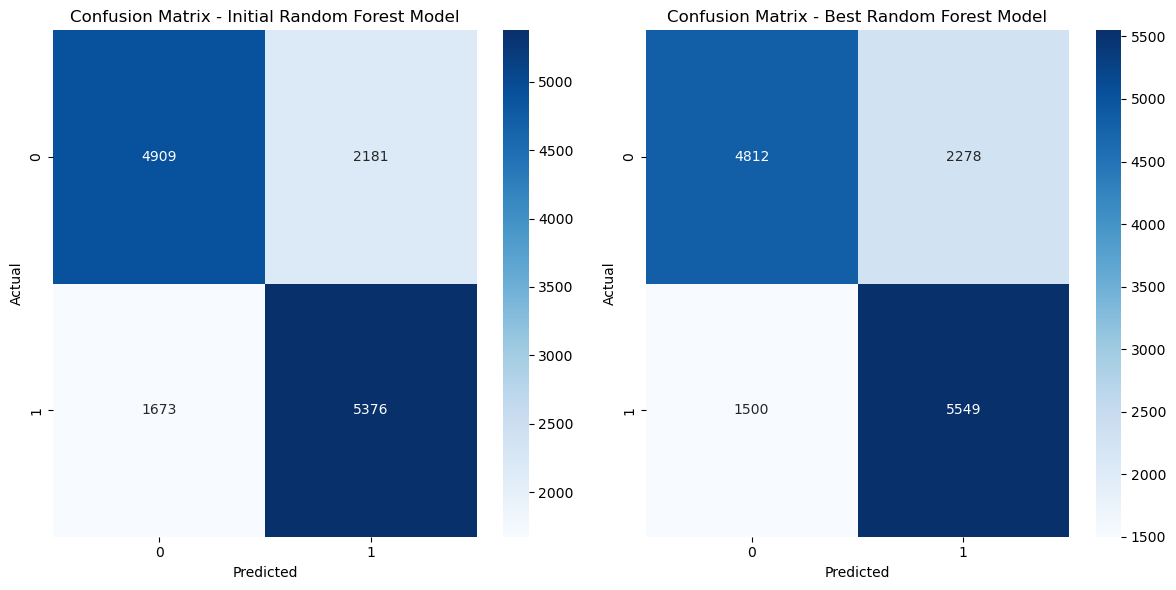

In [62]:

import seaborn as sns
import matplotlib.pyplot as plt

# ...

# Evaluate the initial model
accuracy_initial = accuracy_score(y_test, y_pred_initial)
classification_report_initial = classification_report(y_test, y_pred_initial)
conf_matrix_initial = confusion_matrix(y_test, y_pred_initial)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_tuned)
classification_report_best = classification_report(y_test, y_pred_tuned)
conf_matrix_best = confusion_matrix(y_test, y_pred_tuned)

# Print the results for both models
print("Initial Random Forest Model")
print("Accuracy:", accuracy_initial)
print("Classification Report:")
print(classification_report_initial)

print("\nBest Random Forest Model")
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy_best)
print("Classification Report:")
print(classification_report_best)


# Visualize the confusion matrices for both models using Seaborn
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(conf_matrix_initial, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix - Initial Random Forest Model')

sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Confusion Matrix - Best Random Forest Model')

plt.tight_layout()
plt.show()



Conclusion:

All three models have similar accuracy levels, ranging from 0.73 to 0.75, indicating that they are making correct predictions for approximately 73% to 75% of the instances.

The recall for non-diabetes is highest for the logistic regression model (0.72), followed closely by KNN (0.69) and Random Forest (0.68). Recall is particularly important in medical contexts, as it represents the ability to correctly identify true non-diabetic cases out of all the actual non-diabetic cases.

Limitations of the dataset 
•	The dataset does not separate Type I and II diabetes
•	The dataset does not contain family history or races of patients, which are important factors for Type I diabetes

